In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib_venn import venn3, venn3_circles
from collections import Counter
import seaborn as sns

df = pd.read_csv('n_movies.csv', encoding='latin')
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018 ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,(2016 ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,(20152022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,-2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,(2022 ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022 ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130.0
9953,The Walking Dead,(20102022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0
9954,The Crown,(2016 ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898.0
9955,Supernatural,(20052020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601.0


In [53]:
genre = []
gp_genre = []
for att in df['genre']:
    try:
        att = att.split(", ")
        for txt in att:
            genre.append(txt)
        gp_genre.append(att)
    except:
        genre.append('None')
        gp_genre.append(['None'])
genre = np.array(genre)
values_genre, counts_genre = np.unique(genre, return_counts=True)
values_genre

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'None', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [54]:
df['genre'] = gp_genre
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018 ),TV-14,30 min,"[Action, Comedy, Drama]",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,(2016 ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,(20152022),TV-MA,46 min,"[Crime, Drama]",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,-2022,TV-MA,356 min,"[Drama, Horror, Mystery]",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,(2022 ),TV-MA,24 min,"[Animation, Action, Adventure]",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022 ),TV-MA,45 min,"[Action, Adventure, Drama]",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130.0
9953,The Walking Dead,(20102022),TV-MA,44 min,"[Drama, Horror, Thriller]",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0
9954,The Crown,(2016 ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898.0
9955,Supernatural,(20052020),TV-14,44 min,"[Drama, Fantasy, Horror]",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601.0


In [55]:
list_hour = []
duration =  df['duration']
for hours in duration:
    try:
        hour = hours.split(" min")
        list_hour.append(float(hour[0]))
    except:
        list_hour.append(hours)
df["new_duration"] = list_hour
df

,title,year,certificate,duration,genre,rating,description,stars,votes,new_duration
0,Cobra Kai,(2018 ),TV-14,30 min,"[Action, Comedy, Drama]",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,30.0
1,The Crown,(2016 ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,58.0
2,Better Call Saul,(20152022),TV-MA,46 min,"[Crime, Drama]",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,46.0
3,Devil in Ohio,-2022,TV-MA,356 min,"[Drama, Horror, Mystery]",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,356.0
4,Cyberpunk: Edgerunners,(2022 ),TV-MA,24 min,"[Animation, Action, Adventure]",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,24.0
...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022 ),TV-MA,45 min,"[Action, Adventure, Drama]",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130.0,45.0
9953,The Walking Dead,(20102022),TV-MA,44 min,"[Drama, Horror, Thriller]",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0,44.0
9954,The Crown,(2016 ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898.0,58.0
9955,Supernatural,(20052020),TV-14,44 min,"[Drama, Fantasy, Horror]",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601.0,44.0


In [56]:
certificate = []
for att in df["certificate"]:
    certificate.append(str(att))

values_certificate, counts_certificate = np.unique(certificate, return_counts=True)
values_certificate

array(['12', 'Approved', 'E10+', 'G', 'M', 'MA-17', 'NC-17', 'Not Rated',
       'PG', 'PG-13', 'Passed', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'Unrated', 'nan'], dtype='<U9')

In [57]:
num_genre2d = []
for txt in values_certificate:
    numgenre2d = []
    num_genre = []
    for num in range(len(df["genre"])):
        if txt == str(df["certificate"][num]):
            for che in df["genre"][num]:
                num_genre.append(che)
    values, counts = np.unique(num_genre, return_counts=True)
    numgenre2d.append(list(values))
    numgenre2d.append(list(counts))
    numgenre2d.append(txt)
    num_genre2d.append(numgenre2d)
for num in range(len(values_genre)):
    print('{0} : {1}'.format(values_genre[num], counts_genre[num]))

Action : 1969
Adventure : 1563
Animation : 1434
Biography : 390
Comedy : 3098
Crime : 1491
Documentary : 1349
Drama : 4194
Family : 493
Fantasy : 555
Film-Noir : 12
Game-Show : 86
History : 415
Horror : 530
Music : 236
Musical : 84
Mystery : 768
News : 23
None : 73
Reality-TV : 456
Romance : 1007
Sci-Fi : 293
Short : 351
Sport : 188
Talk-Show : 55
Thriller : 889
War : 73
Western : 34


# Graph 1 Number Of Movies Of Each Genre

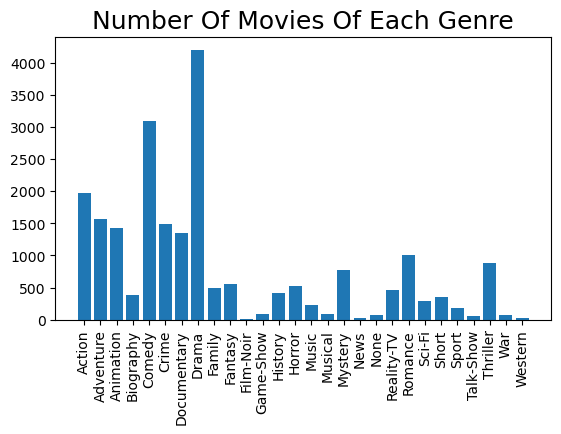

In [58]:
height = counts_genre
bars = values_genre
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)
plt.xticks(x_pos, bars, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.title(label= "Number Of Movies Of Each Genre", fontsize=18, color="black")
plt.show()

# Graph 2 Set Of Movies Of Each Genre

Lady of Steel : ['Crime', 'Drama', 'Romance']
Extinct : ['Animation', 'Adventure', 'Comedy']
Lucifer : ['Crime', 'Drama', 'Fantasy']


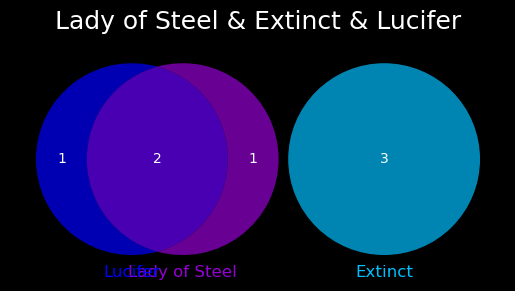

In [59]:
ran_genre = np.random.choice(df['title'], 3)
title = list(df['title'])
asix_1 = title.index(ran_genre[0])
asix_2 = title.index(ran_genre[1])
asix_3 = title.index(ran_genre[2])

print("{0} : {1}".format(df['title'][asix_1], gp_genre[asix_1]))
print("{0} : {1}".format(df['title'][asix_2], gp_genre[asix_2]))
print("{0} : {1}".format(df['title'][asix_3], gp_genre[asix_3]))

sets = Counter()   
set1 = set(gp_genre[asix_1])
set2 = set(gp_genre[asix_2])
set3 = set(gp_genre[asix_3])
colors = ['darkviolet','deepskyblue','blue']

fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'


ax = plt.gca()
venn = venn3([set1, set2, set3], (df['title'][asix_1], df['title'][asix_2], df['title'][asix_3]), ax=ax,set_colors=colors,alpha=0.7)

i = 0
for text in venn.set_labels:
    text.set_color(colors[i])
    i+=1

plt.title(label= "{0} & {1} & {2}".format(df['title'][asix_1], df['title'][asix_2], df['title'][asix_3]), fontsize=18, color="white")
plt.show()

# Graph 3 Rating/Duration (min) & Votes

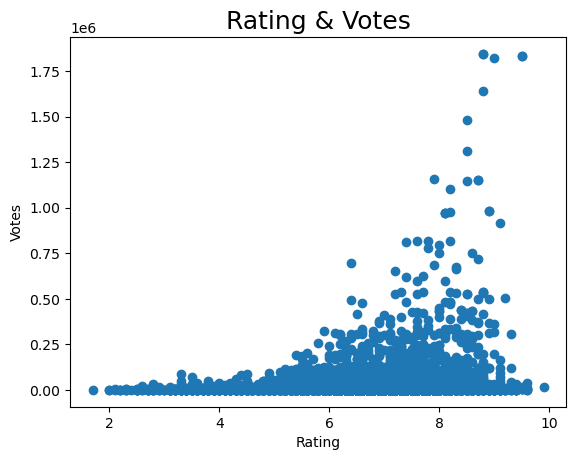

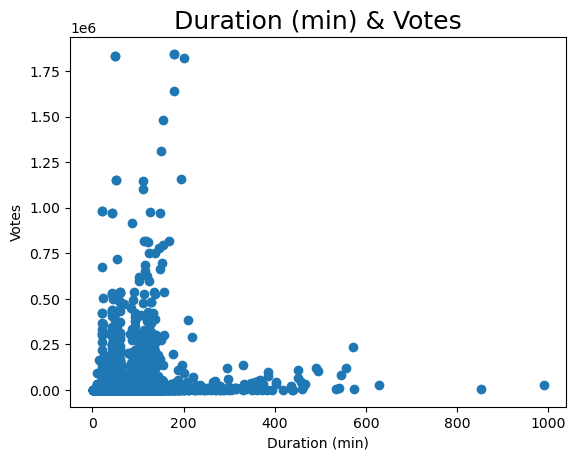

In [60]:
data = df["rating"]
value = df["votes"]

plt.xlabel('Rating')
plt.ylabel('Votes')
plt.scatter(data, value)
plt.title(label= "Rating & Votes", fontsize=18, color="black")
plt.show()

data = df["new_duration"]
value = df["votes"]

plt.xlabel('Duration (min)')
plt.ylabel('Votes')
plt.scatter(data, value)
plt.title(label= "Duration (min) & Votes", fontsize=18, color="black")
plt.show()

# Graph 4  Set Of Movies Of Each Certificate

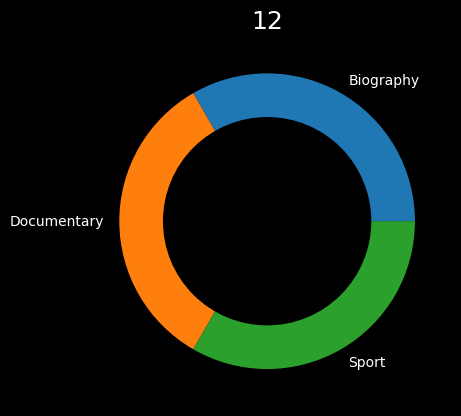

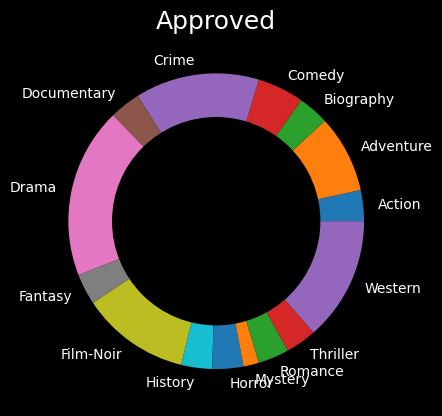

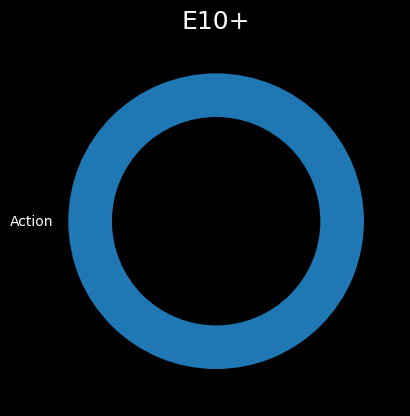

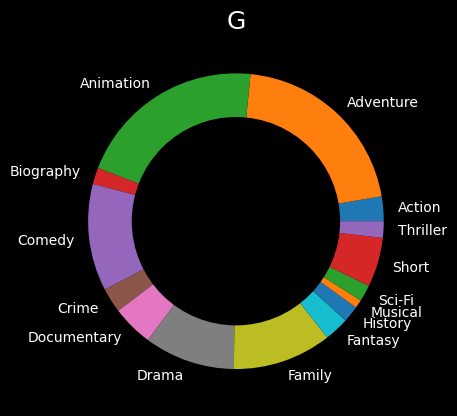

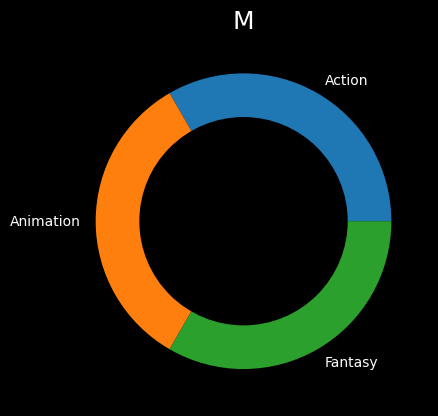

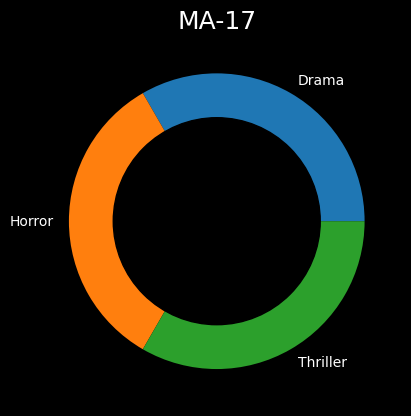

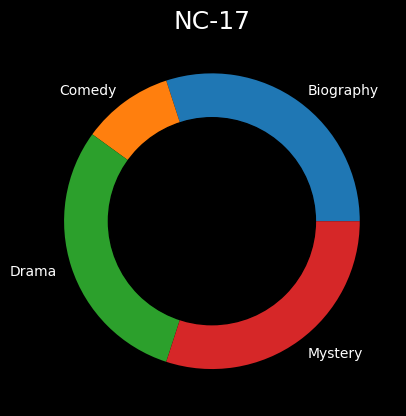

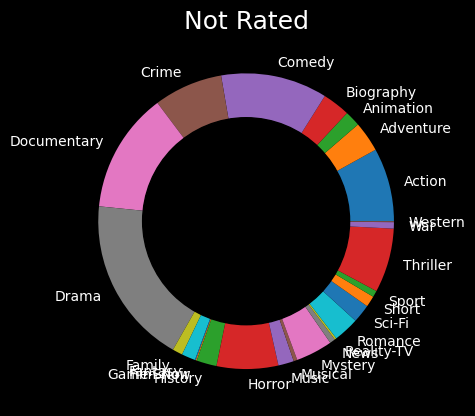

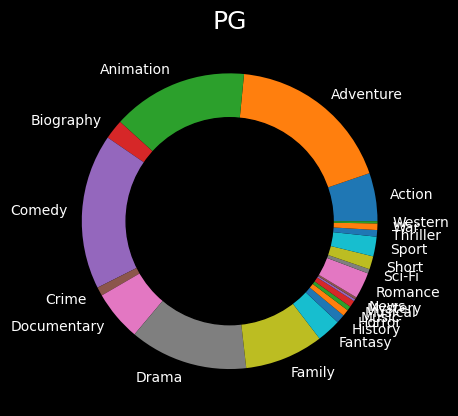

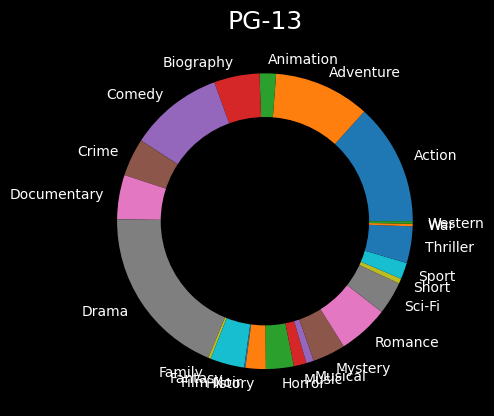

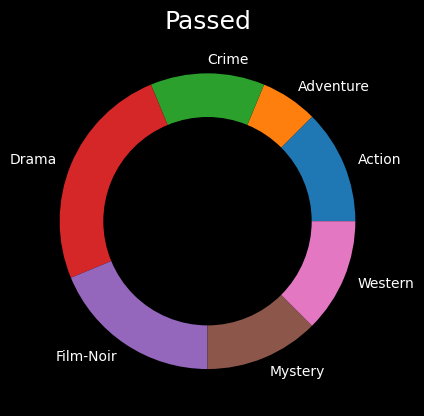

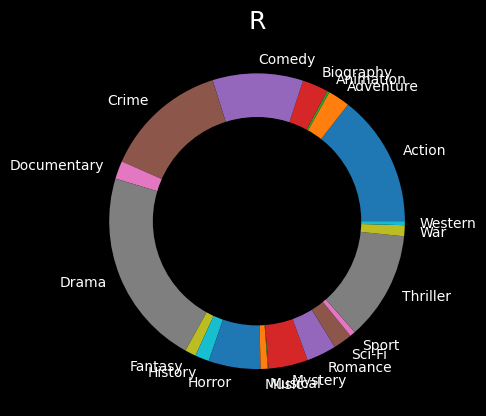

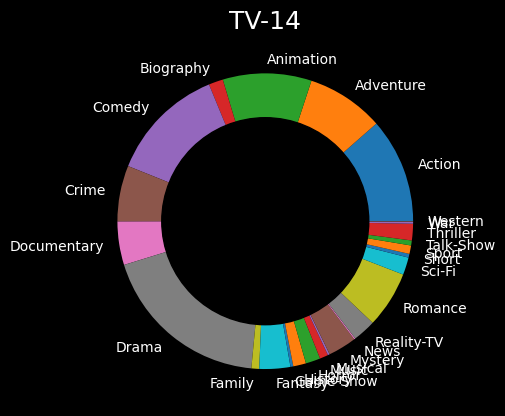

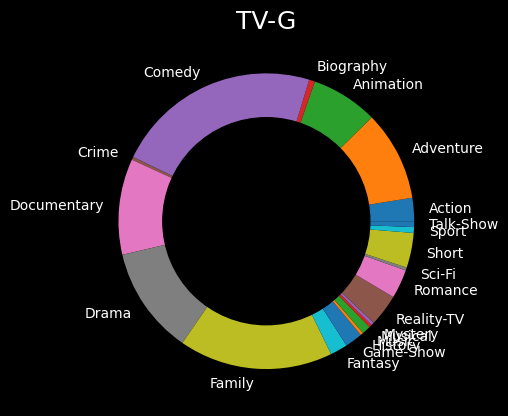

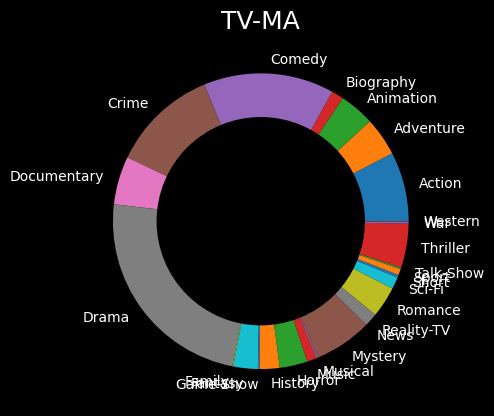

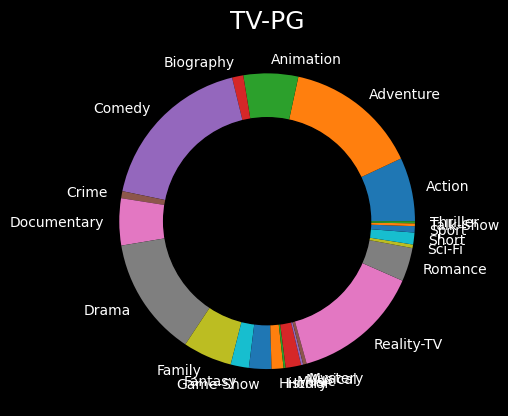

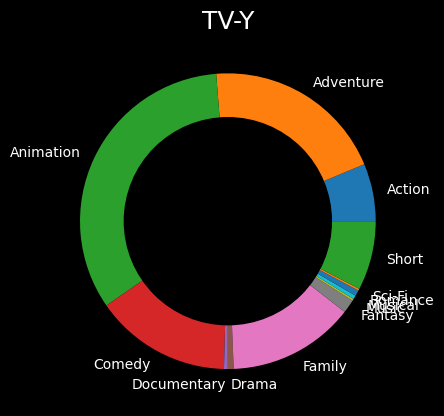

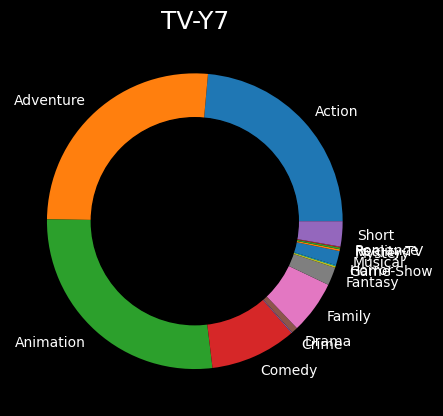

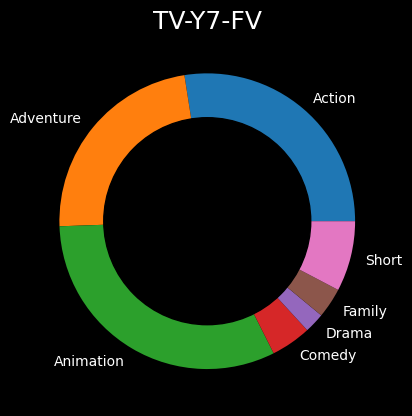

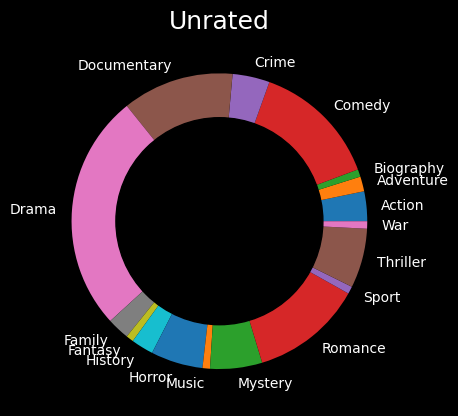

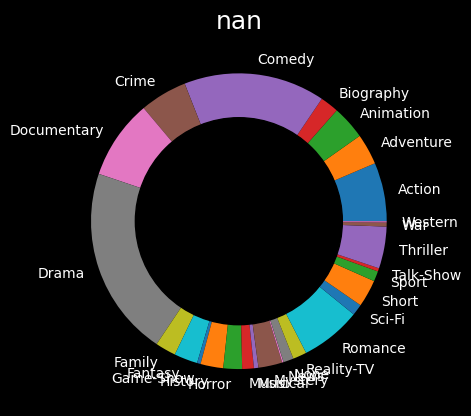

In [61]:
for names in num_genre2d:
    name = names[0]
    size = names[1]
    fig = plt.figure()
    fig.patch.set_facecolor('black')
    plt.rcParams['text.color'] = 'white'
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    plt.pie(size, labels=name)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(label= "{0}".format(names[2]), fontsize=18, color="white")
    plt.show()